**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: [Mathias Gruber](https://towardsdatascience.com/why-you-should-not-rely-on-t-sne-umap-or-trimap-f8f5dc333e59.). Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 13: Análisis de Componentes Principales (PCA)

El PCA es un método de *machine learning* no supervisado  para reducir dimensionalmente un modelo con una gran cantidad de variables. Para esta reducción permite identificar las varibales que mas le aportan a la varianza del modelo. En este ejemplo vamos a utilizar un conjunto de variables importados desde una tabla de Excel.

Se importan todas las librerías a utilizar.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

Se define la ruta de acceso y se importan los archivos.

In [6]:
from sklearn.datasets import load_iris
iris=load_iris()
X=iris['data']
y=iris['target']
print('X:',np.shape(X))
print('y:',np.shape(y))

X: (150, 4)
y: (150,)


Se debe escalar los datos antes de aplicar PCA.

In [ ]:
scaler=StandardScaler()
ld=scaler.fit(X)
X_scaled=ld.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=iris.feature_names)

## Cómo calcular PCA

Los vectores propios de una matriz se pueden obtener de tres formas diferentes. La mas común es obteniendo los vectores propios de la matriz de convarianza.

In [ ]:
from IPython.display import display, Math, Latex
print('La matriz de convarianza es:')
display(Math(r'\Sigma = \frac{1}{n-1}((X-\overline{x})^T(X-\overline{x}))'))

La matriz de convarianza es:


<IPython.core.display.Math object>

Para este método se debe utilizar la matriz normalizada:

In [ ]:
mean_vect = np.mean(X_scaled, axis=0)
cov_matrix = (X_scaled - mean_vect).T.dot((X_scaled - mean_vect))/(X_scaled.shape[0]-1)
print("La matriz de covarianzas es \n%s"%cov_matrix)

La matriz de covarianzas es 
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.006711         -0.118359           0.877604   
sepal width (cm)           -0.118359          1.006711          -0.431316   
petal length (cm)           0.877604         -0.431316           1.006711   
petal width (cm)            0.823431         -0.368583           0.969328   

                   petal width (cm)  
sepal length (cm)          0.823431  
sepal width (cm)          -0.368583  
petal length (cm)          0.969328  
petal width (cm)           1.006711  


Numpy tiene una función que calcula directamente la matriz de convarianza de la siguiente forma:

In [ ]:
np.cov(X_scaled.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Como se puede observar, el resutlado de la matriz de convarianza es igual.  
Finalmente, calculamos los valores propios y vectores propios de dicha matriz de covarianza. Los componentes principales corresponden a los vectores propios.

In [ ]:
eig_vals, eig_vectors = np.linalg.eig(cov_matrix)
print("Valores propios \n%s"%eig_vals)
print("Vectores propios \n%s"%eig_vectors)

Valores propios 
[2.93808505 0.9201649  0.14774182 0.02085386]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Tambien es posible utlizar la matriz de correlación para obtener los componentes principales. En este caso corresponden a los vectores propios de la matriz de correlación. La matriz de covarianza de la matriz normalizada es igual a la matriz de correlación.

In [ ]:
corr_matrix = np.corrcoef(X.T)
eig_vals_corr, eig_vectors_corr = np.linalg.eig(corr_matrix)
print("Valores propios \n%s"%eig_vals_corr)
print("Vectores propios \n%s"%eig_vectors_corr)

Valores propios 
[2.91849782 0.91403047 0.14675688 0.02071484]
Vectores propios 
[[ 0.52106591 -0.37741762 -0.71956635  0.26128628]
 [-0.26934744 -0.92329566  0.24438178 -0.12350962]
 [ 0.5804131  -0.02449161  0.14212637 -0.80144925]
 [ 0.56485654 -0.06694199  0.63427274  0.52359713]]


Finalmente, tambien se utiliza el método de *Singular Value Decomposition*, donde los componentes principales corresponden a la matriz *U*.

In [ ]:
u,s,v = np.linalg.svd(X_scaled.T)
u

array([[-0.52106591, -0.37741762,  0.71956635,  0.26128628],
       [ 0.26934744, -0.92329566, -0.24438178, -0.12350962],
       [-0.5804131 , -0.02449161, -0.14212637, -0.80144925],
       [-0.56485654, -0.06694199, -0.63427274,  0.52359713]])

## PCA con *Scikitlearn*

Se implementa el análisis PCA con la librería sklearn de Python.

In [ ]:
n = len(X[1])  # número de features
pca = PCA(n_components=n).fit(X_scaled)
print(pca.components_)

[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]
 [-0.26128628  0.12350962  0.80144925 -0.52359713]]


In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762 0.03668922 0.00517871]


Se puede graficar cuanto aporta a la varianza cada componente generado.

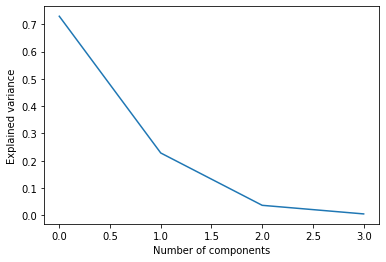

In [ ]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

Graficamos el acumulado de varianza explicada en las nuevas dimensiones.

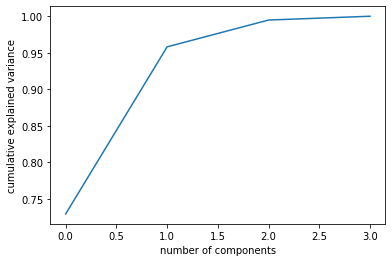

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

Para transformar las observaciones en el nuevo espacio dimencional se utiliza la siguiente función:

In [ ]:
pca_samples = pca.transform(X_scaled)

Para identificar cada variable como se relaciona con las componentes utilizamos las figuras byplot de Python. 0,1 denota el componente principal 1 y 2 (PC1 y PC2). Ademas se grafican las observaciones por cada clase en el nuevo espacio dimensional.

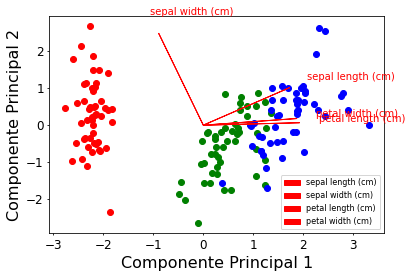

In [ ]:
xvector = pca.components_[0] 
yvector = pca.components_[1]

xs = pca.transform(X_scaled)[:,0] 
ys = pca.transform(X_scaled)[:,1]

## Para visualizar las proyecciones de cada variable en los componentes se utiliza la siguiente función
for i in range(len(xvector)):
# arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, xvector[i]*max(xs), yvector[i]*max(ys),
              color='r', width=0.0005, head_width=0.0025)
    plt.text(xvector[i]*max(xs)*1.2, yvector[i]*max(ys)*1.2,
             list(X_scaled.columns.values)[i], color='r') 

for c, i, iris.target_names in zip("rgb", [0, 1, 2], iris.feature_names):
   plt.scatter(pca_samples[y==i,0], pca_samples[y==i,1], c=c)
plt.tick_params('y', colors='k', labelsize=12, length=2)
plt.tick_params('x', colors='k', labelsize= 12, length=2)
plt.xlabel("Componente Principal 1", fontsize=16)
plt.ylabel("Componente Principal 2", fontsize=16)
plt.legend(iris.feature_names, fontsize=8)
plt.show()

Se puede construir una tabla donde se observe para cada variable su aporte en cada componente. Por lo tanto las variables que mas le aporten a los componentes principales que tienen la mayor varianza, pues serán las mejores variables.

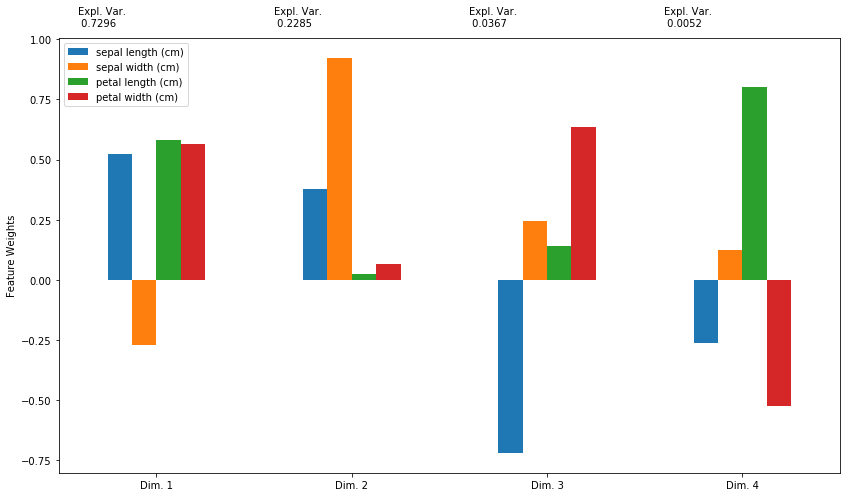

In [ ]:
def pca_results(X_scaled, pca):
    
    dimensions = ['Dim. {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    components = pd.DataFrame(np.round(pca.components_, 4), columns = X_scaled.keys()) 
    components.index = dimensions

    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    fig, ax = plt.subplots(figsize = (14,8))

    components.plot(ax = ax, kind = 'bar')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Expl. Var.\n %.4f"%(ev))

    return pd.concat([variance_ratios, components], axis = 1)

pca_results = pca_results(X_scaled, pca)

Esta tabla también se resume en esta otra tabla.

In [ ]:
print(pca_results.cumsum())

        Explained Variance  sepal length (cm)  sepal width (cm)  \
Dim. 1              0.7296             0.5211           -0.2693   
Dim. 2              0.9581             0.8985            0.6540   
Dim. 3              0.9948             0.1789            0.8984   
Dim. 4              1.0000            -0.0824            1.0219   

        petal length (cm)  petal width (cm)  
Dim. 1             0.5804            0.5649  
Dim. 2             0.6049            0.6318  
Dim. 3             0.7470            1.2661  
Dim. 4             1.5484            0.7425  


##More dimensionality reduction methods
**PCA**: here the data (which is potentially correlated) is reframed into uncorrelated principal components, which contain decreasing amounts of information as measured by variance. Using this method to visualize only the first initial components (describing most of the variance) is inherently a method that captures primarily the global structure of the data.

**t-SNE**: here gradient descent is used to find a low dimensional embedding in which a relative distance between point i and j match that in the original high-dimensional space, under the control of a not very intuitive perplexity parameter that determines the standard deviation of the conditional distributions used for the relative distance calculations in high-dimensional space. This method primarily focuses on local structure, in that it puts focus on nearest neighbors in the relative distance calculations.

**UMAP**: here a weighted graph of nearest neighbors is constructed with vertices being observations / data points, and stochastic gradient descent is then used to optimize a lower-dimensional graph to be as structurally similar as possible to the high-dimensional one. UMAP has a lot of advantages over t-SNE in that it better preserves global structure, is faster, and has slightly more interpretable hyper parameters, but at its core it uses distances between nearest neighbors in the construction of the graph, and as such focuses on local structure.

**TriMAP**: here triplets (sets of three observations) are created predominantly from nearest neighbors, but with a fraction of the triplets also containing one or two randomly sampled points. The algorithm then tries to find a lower dimensional embedding using batch gradient descent, which preserves the ordering of distances of the triplets. Theoretically this method manages to include both local and global structure, but in practice it is typically found to be prone to struggle with local structure.

**PaCMAP**: This mnethod optimizes the low-dimensional graph in a way to conserve both local and global graph structure, again showing how most algorithms are near-sighted (i.e. focus on local structure)

In [ ]:
!pip install trimap==1.0.15 umap-learn==0.5.1 pacmap==0.3

In [27]:
import time
import trimap
import umap
import pacmap
from sklearn.manifold import TSNE

# Algorithms to test
algorithms = {
    't-SNE': TSNE(),
    'UMAP': umap.UMAP(),
    'TriMAP': trimap.TRIMAP(),
    'PaCMAP': pacmap.PaCMAP()
}

# Create embeddings for each algorithm & save fitting time
results = {}
for name, algorithm in algorithms.items():

    # Calculate embeddings
    embedding = algorithm.fit_transform(X)

    # Store results & runtime
    results[name] = {
        'embedding': pd.DataFrame(embedding, columns=['x', 'y']), 
    }

TRIMAP(n_inliers=10, n_outliers=5, n_random=5, distance=euclidean, lr=1000.0, n_iters=400, weight_adj=500.0, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


running TriMap on 150 points with dimension 4
pre-processing
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100, Loss: 5.531, Violated triplets: 0.0670
Iteration:  200, Loss: 5.425, Violated triplets: 0.0658
Iteration:  300, Loss: 5.387, Violated triplets: 0.0653
Iteration:  400, Loss: 5.339, Violated triplets: 0.0647
Elapsed time: 0:00:00.197327


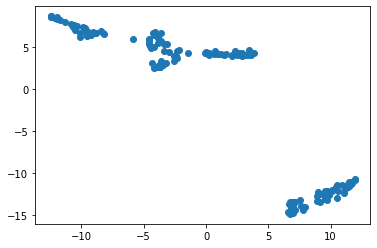

In [41]:
PaCMAP=results["PaCMAP"]["embedding"]
plt.scatter(PaCMAP.x, PaCMAP.y)

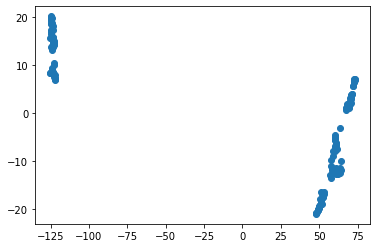

In [42]:
TriMAP=results["TriMAP"]["embedding"]
plt.scatter(TriMAP.x, TriMAP.y)

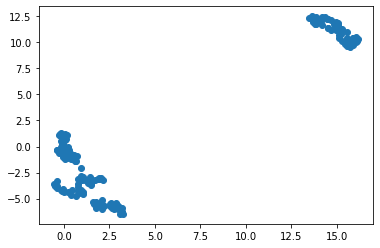

In [43]:
UMAP=results["UMAP"]["embedding"]
plt.scatter(UMAP.x, UMAP.y)

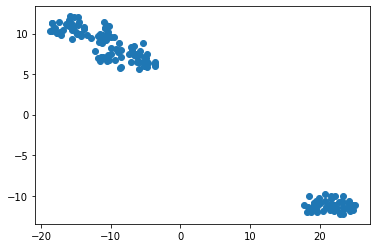

In [46]:
tSNE=results["t-SNE"]["embedding"]
plt.scatter(tSNE.x, tSNE.y)